In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

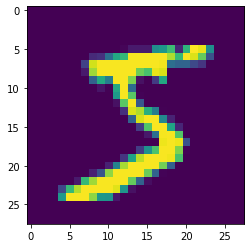

In [5]:
plt.imshow(x_train[0])

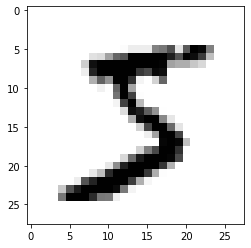

In [9]:
plt.imshow(x_train[0], cmap='binary')

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_train = tf.keras.utils.normalize(x_train, axis=1)

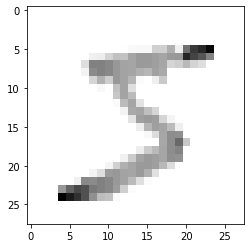

In [13]:
plt.imshow(x_train[0], cmap='binary')

In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
y_train[0]

5

In [22]:
import numpy as np
x_train = np.array(x_train).reshape(-1,28,28,1)
x_test = np.array(x_test).reshape(-1,28,28,1)

In [23]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [24]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [25]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:
cnn.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 90s 46ms/step - loss: 0.5379 - accuracy: 0.8278
Epoch 2/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0843 - accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0557 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0435 - accuracy: 0.98671s - los
Epoch 5/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0367 - accuracy: 0.9887


In [27]:
pred = cnn.predict(x_test)

In [28]:
print(pred)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
print(np.argmax(pred[0]))

7


In [33]:
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

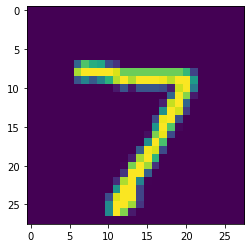

In [35]:
plt.imshow(x_test1[0])

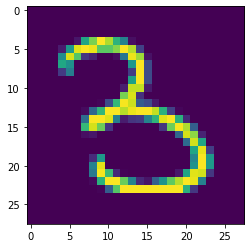

In [52]:
plt.imshow(x_test1[524])

In [53]:
print(np.argmax(pred[524]))

3


In [55]:
import cv2

In [174]:
img = cv2.imread('digit_rec.png')

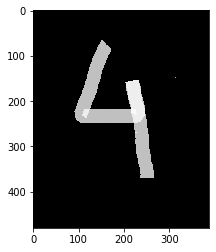

In [175]:
plt.imshow(img)

In [176]:
img.shape

(480, 388, 3)

In [177]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [178]:
gray.shape

(480, 388)

In [179]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [180]:
resized.shape

(28, 28)

In [181]:
newimg = tf.keras.utils.normalize(resized, axis=1)

In [182]:
newimg = np.array(newimg).reshape(-1,28,28,1)

In [183]:
newimg.shape

(1, 28, 28, 1)

In [184]:
pred = cnn.predict(newimg)

In [185]:
print(np.argmax(pred))

4
